# BI-PRS: semestr√°ln√≠ projekt 3

C√≠lem t≈ôet√≠ho semestr√°ln√≠ho projektu je anal√Ωza hrub√©ho dom√°c√≠ho produktu evropsk√Ωch zem√≠. Zamƒõ≈ô√≠me se na srovn√°n√≠ HDP r≈Øzn√Ωch evropsk√Ωch zem√≠ v nƒõjak√©m konkr√©tn√≠m roce a identifikujeme trendy a vzory ve v√Ωvoji jejich ekonomik. D√°le se pokus√≠me porozumƒõt faktor≈Øm, kter√© ovliv≈àuj√≠ rozd√≠ly v HDP mezi jednotliv√Ωmi zemƒõmi a jak√Ωm zp≈Øsobem politick√©, soci√°ln√≠ a ekonomick√© faktory formuj√≠ ekonomickou prosperitu Evropy. Na≈°e anal√Ωza by mƒõla poskytnout ucelen√Ω pohled na ekonomickou situaci a trendy v Evropƒõ a slou≈æit jako z√°klad pro diskusi o mo≈æn√Ωch politik√°ch a opat≈ôen√≠ch pro podporu ekonomick√©ho r≈Østu a prosperity v regionu.

N√°≈° t√Ωm se skl√°d√° ze t≈ô√≠ lid√≠: Ruslana Orazbekova (orazbrus), Nelly Shikina (shikinel), Daria Sychova (sychodar). Nejprve zjist√≠me, pro kter√Ω rok budeme data zkoumat pomoc√≠ zn√°m√©ho vzorce. Reprezentatntem ve t≈ôet√≠m semestr√°ln√≠m projektu je Nelly Shikina.


In [266]:
# K = den narozen√≠ reprezentanta skupiny (1-31)
# L = poƒçet p√≠smen v p≈ô√≠jmen√≠ reprezentanta
# M = ((K+L)√ó47)mod11+1

K <- 16
L <- nchar('Shikina')
M <- ((K + L) * 47) %% 11 + 1
print(M)
print(2011 + M)

[1] 4
[1] 2015


Uva≈æujeme tedy data z roku 2015.

Nejd≈ô√≠ve naƒçteme pot≈ôebn√© knihovny a po≈æadovan√Ω dataset.

In [267]:
library(eurostat)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(lmtest)
library(car)

In [268]:
# Retrieving GDP data at market prices in euro per capita
data <- get_eurostat("nama_10_pc", time_format = "num", filters = list(na_item = "B1GQ", unit = "CP_EUR_HAB", time = 2015))

# Display the first rows of data for checking
head(data)

Dataset query already saved in cache_list.json...

Reading cache file C:\Users\Nelly\AppData\Local\Temp\RtmpGqcgoB/eurostat/8e0c9884893cac1136cea0b1301f4747.rds

Table  nama_10_pc  read from cache file:  C:\Users\Nelly\AppData\Local\Temp\RtmpGqcgoB/eurostat/8e0c9884893cac1136cea0b1301f4747.rds



freq unit       na_item geo       time values
1 A    CP_EUR_HAB B1GQ    EU27_2020 2015 27500 
2 A    CP_EUR_HAB B1GQ    EU28      2015 29180 
3 A    CP_EUR_HAB B1GQ    EU15      2015 33810 
4 A    CP_EUR_HAB B1GQ    EA        2015 31080 
5 A    CP_EUR_HAB B1GQ    EA20      2015 30830 
6 A    CP_EUR_HAB B1GQ    EA19      2015 31080

Prozkoumejme, co znamenaj√≠ jednotliv√© sloupce datsetu.

1. **freq**: Tento sloupec ud√°v√° frekvenci, s jakou jsou data zaznamen√°na. V tomto p≈ô√≠padƒõ je to "A", co≈æ znamen√°, ≈æe data jsou roƒçn√≠.

2. **unit**: Sloupec `unit` oznaƒçuje jednotku, v n√≠≈æ jsou hodnoty ud√°v√°ny. Zde je uvedeno "CP_EUR_HAB", co≈æ znamen√° "current prices, euros per inhabitant", tedy hodnoty jsou vyj√°d≈ôeny v eurech na obyvatele.

3. **na_item**: Tento sloupec oznaƒçuje polo≈æku N√°rodn√≠ch √∫ƒçt≈Ø podle zvolen√©ho krit√©ria.

4. **geo**: Sloupec `geo` oznaƒçuje geografickou oblast, pro kterou jsou hodnoty uvedeny.

5. **time**: Tento sloupec obsahuje rok, ke kter√©mu se √∫daje vztahuj√≠.

6. **values**: Sloupec `values` obsahuje samotn√© hodnoty HDP vyj√°d≈ôen√© v eurech na obyvatele pro danou oblast (zemƒõ/region) a rok.

In [269]:
# Label the data with label_eurostat
data <- label_eurostat(data)
head(data)

freq   unit                           
1 Annual Current prices, euro per capita
2 Annual Current prices, euro per capita
3 Annual Current prices, euro per capita
4 Annual Current prices, euro per capita
5 Annual Current prices, euro per capita
6 Annual Current prices, euro per capita
  na_item                                
1 Gross domestic product at market prices
2 Gross domestic product at market prices
3 Gross domestic product at market prices
4 Gross domestic product at market prices
5 Gross domestic product at market prices
6 Gross domestic product at market prices
  geo                                                                                                          
1 European Union - 27 countries (from 2020)                                                                    
2 European Union - 28 countries (2013-2020)                                                                    
3 European Union - 15 countries (1995-2004)                                                                    
4 Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)
5 Euro area ‚Äì 20 countries (from 2023)                                                                         
6 Euro area - 19 countries  (2015-2022)                                                                        
  time values
1 2015 27500 
2 2015 29180 
3 2015 33810 
4 2015 31080 
5 2015 30830 
6 2015 31080

Je vidƒõt, ≈æe dataset obsahuje redundantn√≠ sloupce, tak≈æe ne≈æ p≈ôejdeme k √∫kol≈Øm samotn√Ωm, data trochu uprav√≠me. Zbav√≠me se nƒõkter√Ωch sloupc≈Ø.

In [270]:
# Drop unnecessary columns
data <- subset(data, select = c("geo", "values"))
head(data)

geo                                                                                                          
1 European Union - 27 countries (from 2020)                                                                    
2 European Union - 28 countries (2013-2020)                                                                    
3 European Union - 15 countries (1995-2004)                                                                    
4 Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)
5 Euro area ‚Äì 20 countries (from 2023)                                                                         
6 Euro area - 19 countries  (2015-2022)                                                                        
  values
1 27500 
2 29180 
3 33810 
4 31080 
5 30830 
6 31080

In [271]:
# Checking if we have NaN values
any_na <- any(is.na(data))
print(any_na)

[1] TRUE


N√°≈° dataset m√° NA hodnoty. Pod√≠vejme se, kde p≈ôesnƒõ n√°m chyb√≠ data.

In [272]:
# Identifying missing values
missing_values <- is.na(data)

# Display rows with missing values
rows_with_missing <- data[apply(missing_values, 1, any), ]
print(rows_with_missing)

# A tibble: 2 √ó 2
  geo                    values
  <chr>                   <int>
1 Bosnia and Herzegovina     NA
2 Kosovo*                    NA


Chybƒõj√≠c√≠ hodnoty jsou identifikov√°ny v zem√≠ch "Bosnia and Herzegovina" a "Kosovo*". Hodnoty HDP pro tyto zemƒõ v roce 2015 chyb√≠ (oznaƒçeny jako NA).

In [273]:
# Identifying neighboring countries for Bosnia and Herzegovina and Kosovo
neighbors_BiH <- c("Croatia", "Serbia", "Montenegro")
neighbors_Kosovo <- c("Albania", "North Macedonia", "Serbia")

# Selecting data for neighboring countries
data_neighbors_BiH <- subset(data, geo %in% neighbors_BiH)
data_neighbors_Kosovo <- subset(data, geo %in% neighbors_Kosovo)

# Calculating the average GDP of neighboring countries
mean_BiH <- mean(data_neighbors_BiH$values, na.rm = TRUE)
mean_Kosovo <- mean(data_neighbors_Kosovo$values, na.rm = TRUE)

# Replacing missing values with the averages of neighboring countries
data$values[data$geo == "Bosnia and Herzegovina" & is.na(data$values)] <- mean_BiH
data$values[data$geo == "Kosovo*" & is.na(data$values)] <- mean_Kosovo

# Displaying the modified data
print(data[data$geo %in% c("Bosnia and Herzegovina", "Kosovo*"), ])

# A tibble: 2 √ó 2
  geo                    values
  <chr>                   <dbl>
1 Bosnia and Herzegovina  7240 
2 Kosovo*                 4447.


T√≠mto zp≈Øsobem jsme nahradily chybƒõj√≠c√≠ hodnoty pr≈Ømƒõrn√Ωm HDP sousedn√≠ch zem√≠.

In [274]:
# Checking if we have NaN values
any_na <- any(is.na(data))
print(any_na)

[1] FALSE


Data jsou v po≈ô√°dku. Pojƒème na ty √∫lohy.

## ‚ú≠ √öloha 1

Kr√°tce prezentujeme rozdƒõlen√≠ HDP a jeho charakteristiky ƒç√≠selnƒõ i graficky. Probereme si, jak√© √∫daje o jednotliv√Ωch zem√≠ch mohou m√≠t vliv na HDP.

In [275]:
# Basic GDP characteristics
summary(data$values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3560   11702   25355   29899   38190  148440 

Tyto ƒç√≠seln√© charakteristiky poskytuj√≠ u≈æiteƒçn√© informace o rozdƒõlen√≠ HDP v evropsk√Ωch zem√≠ch v roce 2015:

- **Minim√°ln√≠ hodnota**: Nejni≈æ≈°√≠ hodnota HDP v eurech na obyvatele z cel√©ho souboru je 3560. To ukazuje na nejmen≈°√≠ √∫rove≈à ekonomick√© prosperity mezi zkouman√Ωmi zemƒõmi.

- **Prvn√≠ kvartil (1st Qu.)**: Hodnota, pod kterou spad√° prvn√≠ ƒçtvrtina dat, je 11702 eur na obyvatele. To znamen√°, ≈æe 25 % zem√≠ m√° HDP ni≈æ≈°√≠ ne≈æ tato hodnota.

- **Medi√°n**: Medi√°n, co≈æ je st≈ôedn√≠ hodnota datov√©ho souboru, je 25355 eur na obyvatele. To znamen√°, ≈æe polovina zem√≠ m√° HDP ni≈æ≈°√≠ ne≈æ tento medi√°n a polovina m√° vy≈°≈°√≠.

- **Pr≈Ømƒõr (Mean)**: Pr≈Ømƒõrn√° hodnota HDP v evropsk√Ωch zem√≠ch v roce 2015 je 29879 eur na obyvatele. To je aritmetick√Ω pr≈Ømƒõr v≈°ech hodnot HDP.

- **T≈ôet√≠ kvartil (3rd Qu.)**: Hodnota, pod kterou spad√° t≈ôet√≠ ƒçtvrtina dat, je 38190 eur na obyvatele. To znamen√°, ≈æe 75 % zem√≠ m√° HDP ni≈æ≈°√≠ ne≈æ tato hodnota.

- **Maxim√°ln√≠ hodnota**: Nejvy≈°≈°√≠ hodnota HDP v eurech na obyvatele z cel√©ho souboru je 148440. Jedn√° se o nejvy≈°≈°√≠ √∫rove≈à ekonomick√© prosperity mezi zkouman√Ωmi zemƒõmi.

Tyto statistick√© √∫daje n√°m poskytuj√≠ p≈ôehled o rozdƒõlen√≠ HDP a jeho variabilitƒõ mezi evropsk√Ωmi zemƒõmi v roce 2015. Pro p≈ôehlednost nyn√≠ vykresl√≠me histogram rozdƒõlen√≠ HDP v roce 2015.

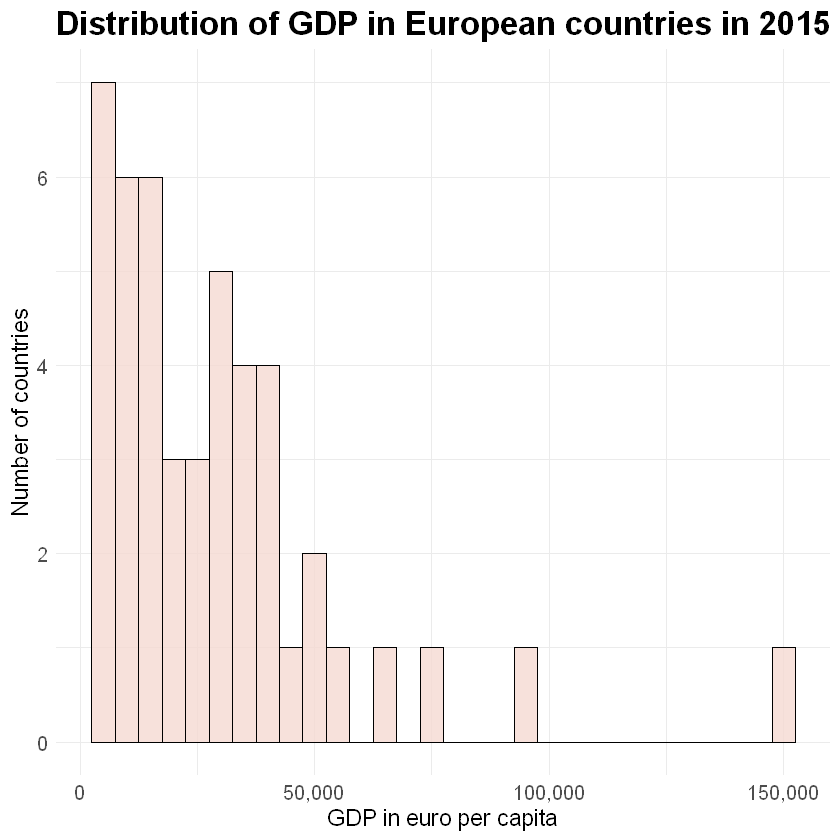

In [276]:
# Histogram
ggplot(data, aes(x = values)) +
  geom_histogram(binwidth = 5000, fill = "#F5DAD2", color = "black", alpha = 0.8) +  # Alpha channel for clarity
  labs(title = "Distribution of GDP in European countries in 2015",
       x = "GDP in euro per capita",
       y = "Number of countries") +
  scale_x_continuous(labels = scales::comma) +  # Adding thousands separators to the x-axis
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14))  # Size of axis labels

Tento histogram zobrazuje rozdƒõlen√≠ hrub√©ho dom√°c√≠ho produktu (HDP) v evropsk√Ωch zem√≠ch v roce 2015. Na osu x je uvedeno HDP v eurech na obyvatele a na osu y poƒçet zem√≠, kter√© dos√°hly dan√© √∫rovnƒõ HDP.

Graf ukazuje, ≈æe vƒõt≈°ina zem√≠ m√° HDP mezi 10 000 a 50 000 eur na obyvatele. Existuje tak√© men≈°√≠ poƒçet zem√≠ s HDP nad 50 000 eur na obyvatele, co≈æ m≈Ø≈æe zahrnovat zemƒõ s vy≈°≈°√≠mi √∫rovnƒõmi ekonomick√© prosperity.

R≈Øzn√© faktory mohou ovliv≈àovat HDP zem√≠. Nƒõkter√© z hlavn√≠ch faktor≈Ø zahrnuj√≠:

* **Ekonomick√° politika**: Makroekonomick√° politika vl√°d, vƒçetnƒõ monet√°rn√≠ politiky a fisk√°ln√≠ politiky, m≈Ø≈æe m√≠t vliv na HDP.

* **Obchodn√≠ politika**: Otev≈ôenost zemƒõ obchodu s ostatn√≠mi zemƒõmi m≈Ø≈æe ovlivnit HDP prost≈ôednictv√≠m exportu a importu zbo≈æ√≠ a slu≈æeb.

* **Technologick√Ω pokrok**: Inovace a technologick√Ω pokrok mohou zvy≈°ovat produktivitu a stimulovat r≈Øst HDP.

* **Pracovn√≠ trh**: Zamƒõstnanost, √∫rove≈à mezd a pracovn√≠ podm√≠nky mohou ovlivnit schopnost zemƒõ generovat HDP.

* **Infrastruktura**: Kvalita infrastruktury, vƒçetnƒõ dopravn√≠ch s√≠t√≠ a telekomunikac√≠, m≈Ø≈æe m√≠t vliv na efektivitu ekonomiky a t√≠m i na HDP.

* **Politick√° stabilita**: Politick√° stabilita a pr√°vn√≠ r√°mec mohou ovlivnit investice a obchod, co≈æ m≈Ø≈æe m√≠t vliv na HDP.

Nyn√≠ m≈Ø≈æeme pokraƒçovat √∫lohou 2.

## ‚ú≠ √öloha 2

Rozhodly jsme se p≈ôidat dal≈°√≠ [dataset](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023) s informacemi o r≈Øzn√Ωch zem√≠ch, vƒçetnƒõ evropsk√Ωch zem√≠ z na≈°eho projektu.

> This comprehensive dataset provides a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more. With every country represented, this dataset offers a complete global perspective on various aspects of nations, enabling in-depth analyses and cross-country comparisons.

Pro zkouman√© zemƒõ m≈Ø≈æeme jako regresory zvolit n√°sleduj√≠c√≠ ƒçty≈ôi p≈ô√≠znaky:

1. **Pr≈Ømƒõrn√Ω vƒõk obyvatelstva**: tato numerick√° promƒõnn√° m≈Ø≈æe poskytnout informace o demografick√© struktu≈ôe zemƒõ a jej√≠m vlivu na ekonomiku, jako je nap≈ô√≠klad pracovn√≠ s√≠la a spot≈ôeba.

2. **Hustota zalidnƒõn√≠**: dal≈°√≠ numerick√° promƒõnn√°, kter√° m≈Ø≈æe ovlivnit HDP, je hustota zalidnƒõn√≠. Vy≈°≈°√≠ hustota obvykle znamen√° vƒõt≈°√≠ ekonomickou aktivitu a p≈ô√≠stup k vƒõt≈°√≠mu trhu.

3. **Jazyk**: tato kategori√°ln√≠ promƒõnn√° m≈Ø≈æe b√Ωt u≈æiteƒçn√° pro rozli≈°en√≠ mezi zemƒõmi na z√°kladƒõ ofici√°ln√≠ho nebo dominantn√≠ho jazyka. Zemƒõ se shodn√Ωm jazykem mohou m√≠t lep≈°√≠ obchodn√≠ vztahy a komunikaci, co≈æ m≈Ø≈æe m√≠t pozitivn√≠ vliv na ekonomiku a cestovn√≠ ruch.

4. **Mƒõna**: dal≈°√≠ kategori√°ln√≠ promƒõnn√°, kter√° m≈Ø≈æe b√Ωt d≈Øle≈æit√°, je mƒõna, kterou zemƒõ pou≈æ√≠v√°. Zemƒõ pou≈æ√≠vaj√≠c√≠ euro mohou m√≠t v√Ωhodu v obchodƒõ a stabilitƒõ mƒõny ve srovn√°n√≠ s zemƒõmi, kter√© pou≈æ√≠vaj√≠ jin√© mƒõny.

Nyn√≠ bychom mohly pou≈æ√≠t regresn√≠ anal√Ωzu k urƒçen√≠ vztahu mezi tƒõmito promƒõnn√Ωmi a HDP (nap≈ô. pomoc√≠ line√°rn√≠ regrese).

Chceme z√≠skat data o pr≈Ømƒõrn√©m vƒõku obyvatelstva z Eurostatu pro rok 2015 s pomoc√≠ identifik√°toru MEDAGEPOP pro st≈ôedn√≠ vƒõk obyvatelstva. Vytvo≈ô√≠me dotaz do datab√°ze Eurostatu, abychom mohly z√≠skat po≈æadovan√° data.

#### ‚ú¶ Pr≈Ømƒõrn√Ω vƒõk a hustota zalidnƒõn√≠

In [277]:
# Data query on the average age of the population in 2019
data_age <- get_eurostat("eq_pop04", filters = list(time="2015", indic_de = "MEDAGEPOP"))

# Displaying first rows of data
head(data_age)

Dataset query already saved in cache_list.json...

Reading cache file C:\Users\Nelly\AppData\Local\Temp\RtmpGqcgoB/eurostat/a2cb954d105b1c38f2e5b96f745df4fb.rds

Table  eq_pop04  read from cache file:  C:\Users\Nelly\AppData\Local\Temp\RtmpGqcgoB/eurostat/a2cb954d105b1c38f2e5b96f745df4fb.rds



freq indic_de  geo       time       values
1 A    MEDAGEPOP EU27_2020 2015-01-01 42.7  
2 A    MEDAGEPOP EA20      2015-01-01   NA  
3 A    MEDAGEPOP EA19      2015-01-01 43.3  
4 A    MEDAGEPOP BE        2015-01-01 41.4  
5 A    MEDAGEPOP BG        2015-01-01 43.4  
6 A    MEDAGEPOP CZ        2015-01-01 41.1

In [278]:
# Drop unnecessary columns
data_age <- subset(data_age, select = c("geo", "values"))
data_age <- label_eurostat(data_age)
head(data_age)

geo                                       values
1 European Union - 27 countries (from 2020) 42.7  
2 Euro area ‚Äì 20 countries (from 2023)        NA  
3 Euro area - 19 countries  (2015-2022)     43.3  
4 Belgium                                   41.4  
5 Bulgaria                                  43.4  
6 Czechia                                   41.1

Pro z√≠sk√°n√≠ dat o hustotƒõ zalidnƒõn√≠ z Eurostatu pro rok 2015 s pomoc√≠ identifik√°toru tps00003 pro hustotu zalidnƒõn√≠ vytvo≈ô√≠me dotaz do datab√°ze Eurostatu.

In [279]:
data_density <- get_eurostat("tps00003", filters = list(time="2015"))

head(data_density)

Dataset query already saved in cache_list.json...

Reading cache file C:\Users\Nelly\AppData\Local\Temp\RtmpGqcgoB/eurostat/9baac2369ca5e1e14c00f14afeba1a84.rds

Table  tps00003  read from cache file:  C:\Users\Nelly\AppData\Local\Temp\RtmpGqcgoB/eurostat/9baac2369ca5e1e14c00f14afeba1a84.rds



freq unit    geo       time       values
1 A    PER_KM2 EU27_2020 2015-01-01 108.1 
2 A    PER_KM2 EA20      2015-01-01    NA 
3 A    PER_KM2 EA19      2015-01-01    NA 
4 A    PER_KM2 BE        2015-01-01 371.8 
5 A    PER_KM2 BG        2015-01-01  66.2 
6 A    PER_KM2 CZ        2015-01-01 136.6

In [280]:
# Identifying missing values
missing_values <- is.na(data_age)

# Display rows with missing values
rows_with_missing <- data_age[apply(missing_values, 1, any), ]
print(rows_with_missing)

# A tibble: 7 √ó 2
  geo                                  values
  <chr>                                 <dbl>
1 Euro area ‚Äì 20 countries (from 2023)     NA
2 Metropolitan France                      NA
3 Norway                                   NA
4 Kosovo*                                  NA
5 Andorra                                  NA
6 Russia                                   NA
7 San Marino                               NA


In [281]:
# Drop unnecessary columns
data_density <- subset(data_density, select = c("geo", "values"))
data_density <- label_eurostat(data_density)
head(data_density)

geo                                       values
1 European Union - 27 countries (from 2020) 108.1 
2 Euro area ‚Äì 20 countries (from 2023)         NA 
3 Euro area - 19 countries  (2015-2022)        NA 
4 Belgium                                   371.8 
5 Bulgaria                                   66.2 
6 Czechia                                   136.6

In [282]:
# Identifying missing values
missing_values <- is.na(data_density)

# Display rows with missing values
rows_with_missing <- data_density[apply(missing_values, 1, any), ]
print(rows_with_missing)

# A tibble: 3 √ó 2
  geo                                   values
  <chr>                                  <dbl>
1 Euro area ‚Äì 20 countries (from 2023)      NA
2 Euro area - 19 countries  (2015-2022)     NA
3 Serbia                                    NA


In [283]:
summary(data_age$values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  30.50   38.67   41.25   40.25   42.73   45.90       7 

In [284]:
summary(data_density$values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    3.3    68.5   102.4   158.3   136.6  1408.4       3 

Warning message:
"Removed 7 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


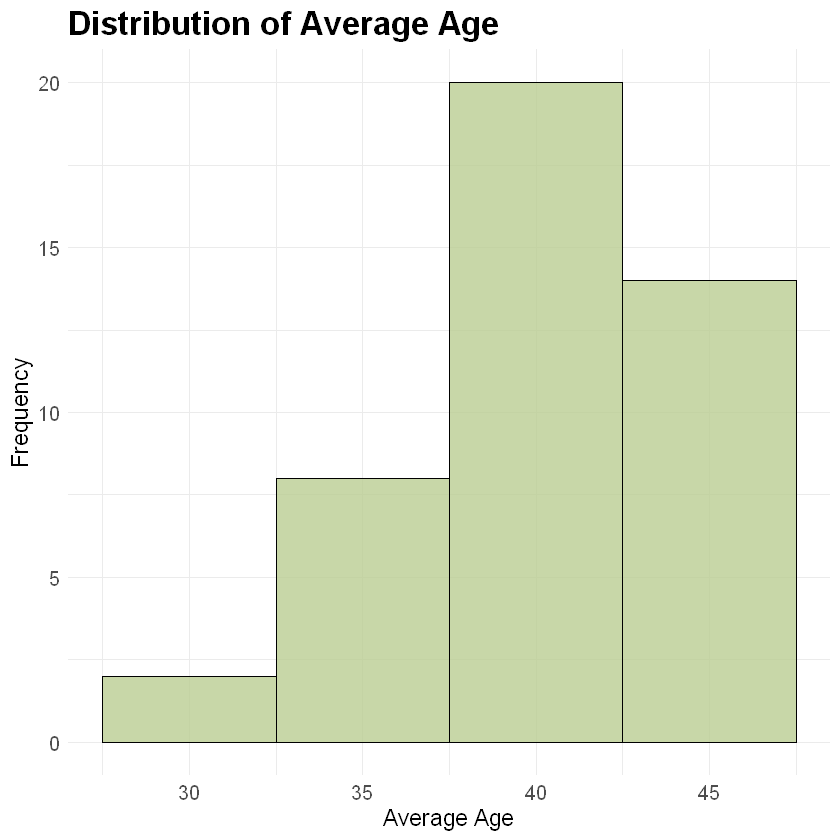

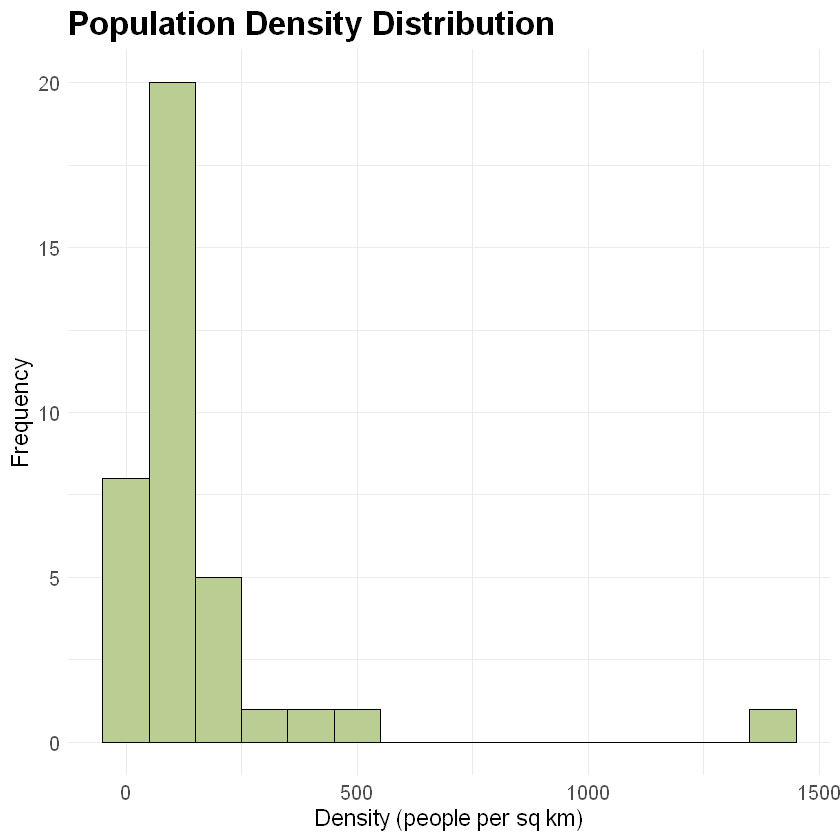

In [285]:
# Age histogram
ggplot(data_age, aes(x=values)) + 
  geom_histogram(binwidth=5, fill="#BACD92", color="black", alpha = 0.8) +
  labs(title = "Distribution of Average Age",
       x = "Average Age",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14))  # Size of axis labels


# Density histogram
ggplot(data_density, aes(x=values)) + 
  geom_histogram(binwidth=100, fill="#BACD92", color="black") +  
  labs(title = "Population Density Distribution",
       x = "Density (people per sq km)",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14))  # Size of axis labels

Na histogramu distribuce pr≈Ømƒõrn√©ho vƒõku vid√≠me, ≈æe nejvƒõt≈°√≠ poƒçet zem√≠ m√° pr≈Ømƒõrn√Ω vƒõk obyvatelstva kolem 40 let, zat√≠mco distribuce hustoty zalidnƒõn√≠ ukazuje, ≈æe vƒõt≈°ina zem√≠ m√° n√≠zkou hustotu zalidnƒõn√≠, s nƒõkolika zemƒõmi v√Ωraznƒõ odli≈°n√Ωmi s velmi vysokou hustotou.

In [286]:
# Rename
data_age_renamed <- data_age %>% rename(age = values)
data_density_renamed <- data_density %>% rename(density = values)

# Join
combined_data <- left_join(data_age_renamed, data_density_renamed, by = "geo")

# Correlation
correlation_result <- cor(combined_data$age, combined_data$density, use = "complete.obs")
print(correlation_result)

[1] 0.07637682


Korelace ve v√Ω≈°i 0,07637682 ukazuje velmi slabou pozitivn√≠ souvislost mezi pr≈Ømƒõrn√Ωm vƒõkem a hustotou zalidnƒõn√≠. To znamen√°, ≈æe vztah mezi tƒõmito dvƒõma promƒõnn√Ωmi je t√©mƒõ≈ô zanedbateln√Ω a nen√≠ v√Ωznamn√Ωm faktorem ve vƒõt≈°inƒõ ekonomick√Ωch model≈Ø.

In [287]:
data_hdp_renamed <- data %>% rename(hdp = values)

In [288]:
data1 <- merge(data_hdp_renamed, data_age_renamed, by = "geo")
data2 <- merge(data1, data_density_renamed, by = "geo")

In [289]:
head(data2)

geo      hdp   age  density
1 Albania   3560 34.7 100.1  
2 Austria  39890 43.0 104.9  
3 Belgium  36960 41.4 371.8  
4 Bulgaria  6380 43.4  66.2  
5 Croatia  10810 42.8  74.4  
6 Cyprus   21170 37.0  92.0

#### ‚ú¶ Jazyk a mƒõna

In [290]:
# Loading data from a CSV file
world_data <- read.csv("world-data-2023.csv", header = TRUE, sep = ",", quote = "\"", dec = ".", fill = TRUE, na.strings = c("", "NA"))

head(world_data)

Country             Density..P.Km2. Abbreviation Agricultural.Land....
1 Afghanistan         60              AF           58.10%               
2 Albania             105             AL           43.10%               
3 Algeria             18              DZ           17.40%               
4 Andorra             164             AD           40.00%               
5 Angola              26              AO           47.50%               
6 Antigua and Barbuda 223             AG           20.50%               
  Land.Area.Km2. Armed.Forces.size Birth.Rate Calling.Code
1 652,230        323,000           32.49       93         
2 28,748         9,000             11.78      355         
3 2,381,741      317,000           24.28      213         
4 468            NA                 7.20      376         
5 1,246,700      117,000           40.73      244         
6 443            0                 15.33        1         
  Capital.Major.City     Co2.Emissions ‚ãØ Out.of.pocket.health.expenditure
1 Kabul                  8,672         ‚ãØ 78.40%                          
2 Tirana                 4,536         ‚ãØ 56.90%                          
3 Algiers                150,006       ‚ãØ 28.10%                          
4 Andorra la Vella       469           ‚ãØ 36.40%                          
5 Luanda                 34,693        ‚ãØ 33.40%                          
6 St. John's, Saint John 557           ‚ãØ 24.30%                          
  Physicians.per.thousand Population Population..Labor.force.participation....
1 0.28                    38,041,754 48.90%                                   
2 1.20                    2,854,191  55.70%                                   
3 1.72                    43,053,054 41.20%                                   
4 3.33                    77,142     NA                                       
5 0.21                    31,825,295 77.50%                                   
6 2.76                    97,118     NA                                       
  Tax.revenue.... Total.tax.rate Unemployment.rate Urban_population Latitude 
1 9.30%           71.40%         11.12%            9,797,273         33.93911
2 18.60%          36.60%         12.33%            1,747,593         41.15333
3 37.20%          66.10%         11.70%            31,510,100        28.03389
4 NA              NA             NA                67,873            42.50628
5 9.20%           49.10%         6.89%             21,061,025       -11.20269
6 16.50%          43.00%         NA                23,800            17.06082
  Longitude 
1  67.709953
2  20.168331
3   1.659626
4   1.521801
5  17.873887
6 -61.796428

In [291]:
colnames(world_data)

[1] "Country"                                  
 [2] "Density..P.Km2."                          
 [3] "Abbreviation"                             
 [4] "Agricultural.Land...."                    
 [5] "Land.Area.Km2."                           
 [6] "Armed.Forces.size"                        
 [7] "Birth.Rate"                               
 [8] "Calling.Code"                             
 [9] "Capital.Major.City"                       
[10] "Co2.Emissions"                            
[11] "CPI"                                      
[12] "CPI.Change...."                           
[13] "Currency.Code"                            
[14] "Fertility.Rate"                           
[15] "Forested.Area...."                        
[16] "Gasoline.Price"                           
[17] "GDP"                                      
[18] "Gross.primary.education.enrollment...."   
[19] "Gross.tertiary.education.enrollment...."  
[20] "Infant.mortality"                         
[21] "Largest.city"                             
[22] "Life.expectancy"                          
[23] "Maternal.mortality.ratio"                 
[24] "Minimum.wage"                             
[25] "Official.language"                        
[26] "Out.of.pocket.health.expenditure"         
[27] "Physicians.per.thousand"                  
[28] "Population"                               
[29] "Population..Labor.force.participation...."
[30] "Tax.revenue...."                          
[31] "Total.tax.rate"                           
[32] "Unemployment.rate"                        
[33] "Urban_population"                         
[34] "Latitude"                                 
[35] "Longitude"

In [292]:
data_language <- world_data %>% select(Country, Official.language) 

ERROR: Error in select(., Country, Official.language): unused arguments (Country, Official.language)


In [ ]:
data_language_renamed <- data_language %>% rename(geo = Country, language = Official.language)

In [ ]:
data_currency <- world_data %>% select(Country, Currency.Code) 

In [ ]:
data_currency_renamed <- data_currency %>% rename(geo = Country, currency = Currency.Code)

In [ ]:
summary(data_language_renamed)

In [ ]:
summary(data_currency_renamed)

In [ ]:
data3 <- merge(data_hdp_renamed, data_language_renamed, by = "geo")
data4 <- merge(data3, data_currency_renamed, by = "geo")

In [ ]:
head(data4)

In [ ]:
#  1 - German, 0 - anything else
data4$language_cat <- ifelse(data4$language == "German", 1, 0)

# 1 - EUR, 0 - anything else
data4$currency_cat <- ifelse(data4$currency == "EUR", 1, 0)

print(head(data4))

In [ ]:
data4$currency_cat[is.na(data4$currency_cat)] <- 0

In [ ]:
library(ggplot2)
library(dplyr)

# Create new categories for labels
data4 <- data4 %>%
  mutate(language_label = ifelse(language_cat == 1, "German", "Else"),
         currency_label = ifelse(currency_cat == 1, "EUR", "Else"))

# Summarize data for language pie chart
language_counts <- data4 %>%
  count(language_label) %>%
  mutate(percentage = n / sum(n) * 100,
         label = paste0(language_label, " (", round(percentage, 1), "%)"))

# Define custom colors for languages
language_colors <- c("German"="#FCFFE0", "Else"="#FFA500")
# Update names based on your labels
language_colors <- setNames(language_colors[names(language_colors)], language_counts$label)

# Language pie chart
ggplot(language_counts, aes(x = "", y = n, fill = label)) +
  geom_bar(width = 1, stat = "identity", color = "black") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Languages") +
  theme_minimal() +
  theme(axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(size = 20, face = "bold"),
        legend.title = element_blank(),
        legend.text = element_text(size = 12)) +
  scale_fill_manual(values = language_colors) # Custom colors

# Summarize data for currency pie chart
currency_counts <- data4 %>%
  count(currency_label) %>%
  mutate(percentage = n / sum(n) * 100,
         label = paste0(currency_label, " (", round(percentage, 1), "%)"))

# Define custom colors for currencies
currency_colors <- c("EUR"="#FCFFE0", "Else"="#FFA500")
# Update names based on labels
currency_colors <- setNames(currency_colors[names(currency_colors)], currency_counts$label)

# Currency pie chart
ggplot(currency_counts, aes(x = "", y = n, fill = label)) +
  geom_bar(width = 1, stat = "identity", color = "black") +
  coord_polar(theta = "y") +
  labs(title = "Distribution of Currencies") +
  theme_minimal() +
  theme(axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        plot.title = element_text(size = 20, face = "bold"),
        legend.title = element_blank(),
        legend.text = element_text(size = 12)) +
  scale_fill_manual(values = currency_colors) # Custom colors

In [ ]:
table_language_currency <- table(data4$language, data4$currency)

# Fisher's test
fisher_test <- fisher.test(table_language_currency)
print(fisher_test)

V√Ωsledky Fisherova p≈ôesn√©ho testu s p-hodnotou 1.375e-11 ukazuj√≠, ≈æe mezi jazykem a mƒõnou existuje statisticky v√Ωznamn√° z√°vislost.

## ‚ú≠ √öloha 3

Pomoc√≠ line√°rn√≠ho regresn√≠ho modelu zkoumejme z√°vislost HDP na v≈°ech regresorech.

### ‚ú¶ Pr≈Ømƒõrn√Ω vƒõk a hustota zalidnƒõn√≠

In [ ]:
model1 <- lm(hdp ~ age + density, data = data2)
summary(model1)

#### ‚ùÄ Interpretace hodnot odhad≈Ø regresn√≠ch koeficient≈Ø
**Intercept** p≈ôedstavuje odhadovanou st≈ôedn√≠ hodnotu z√°visl√© promƒõnn√© (hdp), pokud jsou v≈°echny nez√°visl√© promƒõnn√© (age a density) nulov√©. V tomto p≈ô√≠padƒõ je intercept -17192,40, ale nen√≠ statisticky v√Ωznamn√Ω, proto≈æe p-hodnota (0,794) je vƒõt≈°√≠ ne≈æ zvolen√° hladina v√Ωznamnosti (nap≈ô. 0,05). Proto nen√≠ vhodn√© interpretovat intercept v tomto modelu.

**Age** m√° koeficient 1120,52. To znamen√°, ≈æe p≈ôi zachov√°n√≠ ostatn√≠ch promƒõnn√Ωch se s ka≈ædou jednotkou zv√Ω≈°en√≠ vƒõku odhadovan√° hodnota hdp zv√Ω≈°√≠ o 1120,52 jednotky. Koeficient v≈°ak nen√≠ statisticky v√Ωznamn√Ω (p-hodnota = 0,489 > 0,05), co≈æ naznaƒçuje, ≈æe vƒõk nem√° v tomto modelu v√Ωznamn√Ω line√°rn√≠ vztah s hdp.

**Density** m√° koeficient 13.14. To znamen√°, ≈æe p≈ôi zachov√°n√≠ ostatn√≠ch promƒõnn√Ωch se p≈ôi ka≈æd√©m jednotkov√©m zv√Ω≈°en√≠ hustoty odhadovan√° hodnota hdp zv√Ω≈°√≠ o 13,14 jednotky. Podobnƒõ jako u promƒõnn√© vƒõk nen√≠ koeficient pro hustotu statisticky v√Ωznamn√Ω (p-hodnota = 0,533 > 0,05), co≈æ naznaƒçuje, ≈æe hustota nemus√≠ m√≠t v tomto modelu v√Ωznamn√Ω line√°rn√≠ vztah s hdp.

#### ‚ùÄ Kvalita modelu
Prvn√≠ model je regrese zalo≈æen√° na HDP a vƒõku/hustotƒõ zalidnƒõn√≠. Koeficient determinace (Multiple R-squared) je 0,02827, co≈æ je hodnota bl√≠zk√° nule; to znamen√°, ≈æe pouze 2,83 % rozptylu z√°visl√© promƒõnn√© (HDP) je vysvƒõtleno nez√°visl√Ωmi promƒõnn√Ωmi (vƒõk a hustota). V nejhor≈°√≠m p≈ô√≠padƒõ bude m√≠t model ùëÖ2 = 0, a nejsme od toho daleko. Adjustovan√Ω koeficient determinace je je≈°tƒõ ni≈æ≈°√≠ a ƒçin√≠ -0,03063 (jeho hodnota bude v≈ædy men≈°√≠ nebo rovna hodnotƒõ ùëÖ2). Hodnota men≈°√≠ ne≈æ 0 opƒõt znamen√°, ≈æe model nem√° ≈æ√°dnou vypov√≠dac√≠ hodnotu.

F-statistika testuje celkovou v√Ωznamnost regresn√≠ho modelu. Hodnota F-statistiky se porovn√°v√° s prahovou hodnotou, kter√° je odvozena z F-rozdƒõlen√≠. V√Ωsledek testu se zji≈°≈•uje pomoc√≠ p-hodnoty, kter√° je v na≈°√©m p≈ô√≠padƒõ 0.623, co≈æ je vy≈°≈°√≠ ne≈æ bƒõ≈æn√° hladina v√Ωznamnosti 0.05. To znamen√°, ≈æe nem√°me dostateƒçn√© statistick√© d≈Økazy k z√°vƒõru, ≈æe alespo≈à jedna z nez√°visl√Ωch promƒõnn√Ωch m√° statisticky v√Ωznamn√Ω vliv na z√°vislou promƒõnnou. Tak≈æe F-statistika nen√≠ statisticky v√Ωznamn√° a regresn√≠ model jako celek taky nen√≠ v√Ωznamn√Ω.

#### ‚ùÄ Anal√Ωza rezidu√≠

Zaj√≠m√°j√≠ n√°s p≈ôedev≈°√≠m **pr≈Ømƒõr rezidu√≠** (ide√°lnƒõ hodnota okolo nuly) a **normalita rezidu√≠** (pomoc√≠ testu normality).

In [ ]:
# Histogram of residuals
ggplot(data = data.frame(residuals = resid(model1)), aes(x = residuals)) +
  geom_histogram(binwidth=10000, fill = "#BACD92", color = "black") +
  labs(title = "Histogram of Residuals",
       x = "Residuals",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Q-Q plot of residuals
ggplot(data = data.frame(residuals = resid(model1)), aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Q-Q Plot of Residuals",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Plot of residuals vs fitted values
ggplot(data = data.frame(fitted_values = fitted(model1), residuals = resid(model1)), 
                              aes(x = fitted_values, y = residuals)) +
  geom_point(fill = "#FCFFE0", color = "black") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

In [ ]:
# Calculate mean of residuals
mean_residuals <- mean(resid(model1))
print(mean_residuals)

# Normality of residuals: Shapiro-Wilk test
shapiro_test <- shapiro.test(resid(model1))
normality <- ifelse(shapiro_test$p.value >= 0.05, "Normally distributed", "Not normally distributed")
print(normality)

Pr≈Ømƒõr rezidu√≠ je hodnota velmi bl√≠zk√° nule, co≈æ znamen√°, ≈æe rezidua jsou v pr≈Ømƒõru soust≈ôedƒõna kolem nuly, co≈æ je pro rezidua line√°rn√≠ho regresn√≠ho modelu ≈æ√°douc√≠ vlastnost.

V√Ωsledky Shapiro-Wilkova testu ukazuj√≠, ≈æe p-hodnota je ni≈æ≈°√≠ ne≈æ hladina v√Ωznamnosti 0,05. Proto zam√≠t√°me nulovou hypot√©zu o normalitƒõ, co≈æ znamen√°, ≈æe rezidua nejsou norm√°lnƒõ rozdƒõlena.

#### ‚ùÄ Odlehl√° pozorov√°n√≠ a multikolinearita

Odlehl√© hodnoty identifikujeme pomoc√≠ Cookovy vzd√°lenosti. Multikolinearitu zkoum√°me pomoc√≠ VIF a korelaƒçn√≠ matice.

In [ ]:
# Identify outliers
# Residual Analysis
plot(fitted(model1), resid(model1), main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")

# Leverage-Residual plot
plot(hatvalues(model1), rstandard(model1), main = "Leverage vs Standardized Residuals", xlab = "Leverage", ylab = "Standardized Residuals")

# Cook's distance
cooks_dist <- cooks.distance(model1)
plot(cooks_dist, pch = 19, main = "Cook's Distance", xlab = "Observation", ylab = "Cook's Distance")
abline(h = 4/length(cooks_dist), col = "red")  # Highlight a threshold for influential observations

In [ ]:
# Explore multicollinearity using VIF
vif_values <- vif(model1)
print("VIF values:")
print(vif_values)

# Correlation matrix
correlation_matrix <- cor(data2[, c("age", "density")])
print("Correlation Matrix:")
print(correlation_matrix)

**VIF (Variance Inflation Factor)**  je m√≠ra pou≈æ√≠van√° ke zji≈°tƒõn√≠ p≈ô√≠tomnosti a z√°va≈ænosti multikolinearity v regresn√≠ anal√Ωze. K multikolinearitƒõ doch√°z√≠, kdy≈æ jsou dvƒõ nebo v√≠ce predikƒçn√≠ch promƒõnn√Ωch v regresn√≠m modelu vysoce korelovan√©, co≈æ znamen√°, ≈æe jednu predikƒçn√≠ promƒõnnou lze line√°rnƒõ p≈ôedpovƒõdƒõt z ostatn√≠ch se znaƒçnou m√≠rou p≈ôesnosti. To m≈Ø≈æe zp≈Øsobit probl√©my, proto≈æe to oslabuje statistickou v√Ωznamnost predikƒçn√≠ch promƒõnn√Ωch. V na≈°em p≈ô√≠padƒõ jsou hodnoty VIF pro "age" i "density" p≈ôibli≈ænƒõ 1. To znamen√°, ≈æe mezi tƒõmito predikƒçn√≠mi promƒõnn√Ωmi neexistuje v√Ωznamn√° multikolinearita.

**Korelaƒçn√≠ matice** ukazuje p√°rov√© korelaƒçn√≠ koeficienty mezi predikƒçn√≠mi promƒõnn√Ωmi. Korelaƒçn√≠ koeficient 1 nebo -1 znamen√° dokonalou pozitivn√≠, resp. negativn√≠ korelaci. Korelaƒçn√≠ koeficient bl√≠zk√Ω 0 naznaƒçuje, ≈æe mezi promƒõnn√Ωmi neexistuje line√°rn√≠ korelace.
V na≈°em v√Ωstupu nen√≠ k dispozici korelaƒçn√≠ koeficient mezi "age" a "density" (NA). To znamen√°, ≈æe mezi tƒõmito dvƒõma promƒõnn√Ωmi neexistuje ≈æ√°dn√° korelace.

Otestujeme p≈ôedpoklady modelu - pokud nebudou splnƒõny, vyv√≠j√≠me a otestujeme metody, kter√© toto selh√°n√≠ kompenzuj√≠ nebo p≈ôedpoklady odstra≈àuj√≠. Na to pou≈æijeme ANOVA test rozptylu. Stanov√≠me p≈ô√≠slu≈°n√© hypot√©zy.

**‚óè Promƒõnn√° "age"**

$H_0:$ Koeficient promƒõnn√© "age" v regresn√≠m modelu je roven nule.

$H_A:$ Koeficient promƒõnn√© "age" v regresn√≠m modelu nen√≠ roven nule (co≈æ naznaƒçuje v√Ωznamn√Ω vliv na z√°vislou promƒõnnou).

**‚óè Promƒõnn√° "density"**

$H_0:$ Koeficient promƒõnn√© "density" v regresn√≠m modelu je roven nule.

$H_A:$ Koeficient promƒõnn√© "density" v regresn√≠m modelu nen√≠ roven nule (co≈æ naznaƒçuje v√Ωznamn√Ω vliv na z√°vislou promƒõnnou).

In [ ]:
# Fit the linear regression model
model1 <- lm(hdp ~ age + density, data = data2)

# Perform ANOVA test
anova_result <- anova(model1)

# Print ANOVA table
print(anova_result)

Na z√°kladƒõ v√Ωsledk≈Ø ANOVA vyvozujeme z√°vƒõry.

Promƒõnn√° "age": p-hodnota (0,4581) je vy≈°≈°√≠ ne≈æ zvolen√° hladina v√Ωznamnosti (0,05). Nulovou hypot√©zu pro ‚Äûvƒõk‚Äú tedy nezam√≠t√°me. Nen√≠ dostatek d≈Økaz≈Ø pro z√°vƒõr, ≈æe vƒõk m√° v√Ωznamn√Ω vliv na HDP.

Promƒõnn√° "density": p-hodnota (0.5333) je opƒõt vy≈°≈°√≠ ne≈æ zvolen√° hladina v√Ωznamnosti. Proto nezam√≠t√°me nulovou hypot√©zu ani pro hustotu. Neexistuje dostatek d≈Økaz≈Ø pro z√°vƒõr, ≈æe hustota m√° v√Ωznamn√Ω vliv na HDP.

Na z√°kladƒõ v√Ωsledk≈Ø testu ANOVA se zd√°, ≈æe ani vƒõk, ani hustota zalidnƒõn√≠ nejsou v√Ωznamn√Ωmi prediktory HDP v tomto regresn√≠m modelu.

Nyn√≠ nakresl√≠me grafy, kter√© odhal√≠ vztah mezi z√°vislou promƒõnnou HDP a promƒõnn√Ωmi age/density.

In [ ]:
# HDP/Age
ggplot(data2, aes(x = age, y = hdp)) +
  geom_point() +
  geom_smooth(method = "lm", col = "#75A47F") +
  labs(title = "Relationship between HDP and age",
       x = "Average age of the population",
       y = "HDP") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

# HDP/Density
ggplot(data2, aes(x = density, y = hdp)) +
  geom_point() +
  geom_smooth(method = "lm", col = "#75A47F") +
  labs(title = "Relationship between HDP and density",
       x = "Density",
       y = "HDP") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

Grafy ukazuj√≠, ≈æe i kdy≈æ existuje pozitivn√≠ trend mezi pr≈Ømƒõrn√Ωm vƒõkem obyvatelstva a HDP, a negativn√≠ trend mezi hustotou obyvatelstva a HDP, oba tyto vztahy nejsou statisticky v√Ωznamn√©, co≈æ potvrzuj√≠ anal√Ωzy regresn√≠ch model≈Ø.

### ‚ú¶ Jazyk a mƒõna

U kategori√°ln√≠ a spojit√© promƒõnn√© lze multikolinearitu mƒõ≈ôit pomoc√≠ t-testu (pokud m√° kategori√°ln√≠ promƒõnn√° 2 kategorie) nebo ANOVA (pokud m√° v√≠ce ne≈æ 2 kategorie). ANOVA test stejnƒõ pot≈ôebujeme p≈ôi zkoum√°n√≠ hypot√©z, tak≈æe pust√≠me se do toho.

In [ ]:
model2 <- lm(hdp ~ language_cat + currency_cat, data = data4)
summary(model2)

#### ‚ùÄ Interpretace hodnot odhad≈Ø regresn√≠ch koeficient≈Ø
**Intercept** m√° hodnotu 28,472, co≈æ je statisticky v√Ωznamn√©, proto≈æe p-hodnota je 9.08e-05, co≈æ je mnohem ni≈æ≈°√≠ ne≈æ obvykl√° hladina v√Ωznamnosti 0.05. To naznaƒçuje, ≈æe pr≈Ømƒõrn√° hodnota z√°visl√© promƒõnn√© je statisticky odli≈°n√° od nuly, kdy≈æ jsou v≈°echny nez√°visl√© promƒõnn√© nulov√©.

**Regresn√≠ koeficienty pro jazyk (Language)** , kter√Ω ƒçin√≠ 50,194, naznaƒçuje, ≈æe HDP je statisticky v√Ωznamnƒõ vy≈°≈°√≠ pro kategorie oznaƒçen√© jako language_cat. Vysok√° statistick√° v√Ωznamnost tohoto koeficientu, podpo≈ôen√° p-hodnotou 0.000767, ukazuje na siln√Ω vliv jazyka na HDP v tƒõchto kategori√≠ch.

**Regresn√≠ koeficienty pro mƒõnu (Currency)** je -6,878, co≈æ signalizuje, ≈æe HDP je ni≈æ≈°√≠ pro kategorie pod currency_cat. Av≈°ak s p-hodnotou 0.429333 tento koeficient nen√≠ statisticky v√Ωznamn√Ω, co≈æ naznaƒçuje, ≈æe vliv mƒõny na HDP nen√≠ statisticky podlo≈æen√Ω a m≈Ø≈æe b√Ωt ovlivnƒõn jin√Ωmi faktory nebo ≈°umem v datech.

#### ‚ùÄ Kvalita modelu
Model regresn√≠ anal√Ωzy, zkoumaj√≠c√≠ vztah mezi HDP a promƒõnn√Ωmi language_cat a currency_cat, vykazuje koeficient determinace R2=0,3123R2=0,3123, co≈æ znamen√°, ≈æe model vysvƒõtluje p≈ôibli≈ænƒõ 31.23% variability z√°visl√© promƒõnn√© HDP. Nicm√©nƒõ, upraven√Ω koeficient determinace, kter√Ω bere v √∫vahu poƒçet prediktor≈Ø a velikost vzorku, je pouze 0,2693. Toto relativnƒõ n√≠zk√© ƒç√≠slo m≈Ø≈æe naznaƒçovat, ≈æe p≈ôidan√© prediktory nep≈ôisp√≠vaj√≠ v√Ωznamnƒõ k vysvƒõtlen√≠ variability HDP a model m≈Ø≈æe b√Ωt p≈ôeuƒçen√Ω.

F-statistika, kter√° testuje celkovou v√Ωznamnost modelu, m√° hodnotu 7.265 na 2 a 32 stupn√≠ch volnosti s p-hodnotou 0.002504. Aƒçkoliv tato p-hodnota naznaƒçuje, ≈æe model jako celek m√° statisticky v√Ωznamn√Ω p≈ô√≠nos k vysvƒõtlen√≠ variability HDP, je t≈ôeba b√Ωt opatrn√Ω vzhledem k n√≠zk√©mu upraven√©mu R2R2 a potenci√°ln√≠mu p≈ôeuƒçen√≠. Rozd√≠ly v p-hodnot√°ch mezi F-statistikou a individu√°ln√≠mi koeficienty tak√© ukazuj√≠ na mo≈ænou nekonzistenci ve v√Ωznamnosti jednotliv√Ωch prediktor≈Ø ve srovn√°n√≠ s celkov√Ωm modelem.

#### ‚ùÄ Anal√Ωza rezidu√≠

Analyzujeme stejn√° krit√©ria jako v prvn√≠m modelu.

In [ ]:
# Histogram of residuals
ggplot(data = data.frame(residuals = resid(model2)), aes(x = residuals)) +
  geom_histogram(binwidth = 10000, fill = "#BACD92", color = "black") +
  labs(title = "Histogram of Residuals",
       x = "Residuals",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Q-Q plot of residuals
ggplot(data = data.frame(residuals = resid(model2)), aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Q-Q Plot of Residuals",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Plot of residuals vs fitted values
ggplot(data = data.frame(fitted_values = fitted(model2), residuals = resid(model2)), 
                              aes(x = fitted_values, y = residuals)) +
  geom_point(fill = "#FCFFE0", color = "black") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

In [ ]:
# Calculate mean of residuals
mean_residuals <- mean(resid(model2))
print(mean_residuals)

# Normality of residuals: Shapiro-Wilk test
shapiro_test <- shapiro.test(resid(model2))
normality <- ifelse(shapiro_test$p.value >= 0.05, "Normally distributed", "Not normally distributed")
print(normality)

Pr≈Ømƒõr rezidu√≠ v na≈°em modelu je p≈ôibli≈ænƒõ 2.333118e-13, co≈æ je velmi bl√≠zko nule. To naznaƒçuje, ≈æe v pr≈Ømƒõru jsou rezidua soust≈ôedƒõna kolem nuly, co≈æ je obecnƒõ dobr√© znamen√≠ v regresn√≠ anal√Ωze, jeliko≈æ ukazuje, ≈æe model nem√° systematickou chybu ve sv√Ωch predikc√≠ch.

Nicm√©nƒõ, v√Ωsledky Shapiro-Wilkova testu na normalitu rezidu√≠ ukazuj√≠, ≈æe p-hodnota je ni≈æ≈°√≠ ne≈æ 0.05. Tento v√Ωsledek n√°s vede k zam√≠tnut√≠ nulov√© hypot√©zy o normalitƒõ rozdƒõlen√≠ rezidu√≠. Dosp√≠v√°me tedy k z√°vƒõru, ≈æe rezidua nejsou norm√°lnƒõ rozdƒõlena, co≈æ m≈Ø≈æe m√≠t dopad na v√Ωsledky nƒõkter√Ωch statistick√Ωch test≈Ø, kter√© p≈ôedpokl√°daj√≠ normalitu rezidu√≠ pro plnou validitu sv√Ωch inferenc√≠.

#### ‚ùÄ Odlehl√° pozorov√°n√≠ a multikolinearita

Analogicky jako v prvn√≠m modelu.

In [ ]:
# Identify outliers
# Residual Analysis
plot(fitted(model2), resid(model2), main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")

# Leverage-Residual plot
plot(hatvalues(model2), rstandard(model2), main = "Leverage vs Standardized Residuals", xlab = "Leverage", ylab = "Standardized Residuals")

# Cook's distance
cooks_dist <- cooks.distance(model2)
plot(cooks_dist, pch = 19, main = "Cook's Distance", xlab = "Observation", ylab = "Cook's Distance")
abline(h = 4/length(cooks_dist), col = "#75A47F")  # Highlight a threshold for influential observations

In [ ]:
# Explore multicollinearity

# Correlation matrix
cor_matrix <- cor(data4[c("language_cat", "currency_cat")])
print(cor_matrix)

In [ ]:
# Fit the model
model2 <- lm(hdp ~ language_cat + currency_cat, data = data4)

# Calculate VIF
vif_values <- vif(model2)

# Interpretation
if(any(vif_values > 5)){
  print("Potential multicollinearity problem detected.")
} else {
  print("No significant multicollinearity detected.")
}

**VIF** v tomto p≈ô√≠padƒõ le≈æ√≠ v intervalu (1, 5), co≈æ znamen√°, ≈æe predikƒçn√≠ promƒõnn√© jsou do jist√© m√≠ry korelovan√©, ale m√≠ra multikolinearity nen√≠ natolik z√°va≈æn√°, aby v√Ωznamnƒõ ovlivnila odhady regresn√≠ch koeficient≈Ø.

**Korelaƒçn√≠ matice**  ukazuje, ≈æe neexistuje ≈æ√°dn√Ω v√Ωznamn√Ω line√°rn√≠ vztah mezi language_cat a currency_cat.

Otestujeme p≈ôedpoklady modelu pomoci ANOVA testu. Stanov√≠me p≈ô√≠slu≈°n√© hypot√©zy.

**‚óè Promƒõnn√° "language"**

$H_0:$ Promƒõnn√° "language" nem√° v√Ωznamn√Ω vliv na promƒõnnou "HDP".

$H_A:$ Alespo≈à jedna z kategorie promƒõnn√© "language" m√° v√Ωznamn√Ω vliv na promƒõnnou "HDP".

**‚óè Promƒõnn√° "currency"**

$H_0:$ Promƒõnn√° "currency" nem√° v√Ωznamn√Ω vliv na promƒõnnou "HDP".

$H_A:$ Alespo≈à jedna z kategorie promƒõnn√© "currency" m√° v√Ωznamn√Ω vliv na promƒõnnou "HDP".

In [ ]:
# Perform ANOVA test
anova_result <- anova(model2)

# Print ANOVA table
print(anova_result)

V√Ωsledky ANOVA testu ukazuj√≠ n√°sleduj√≠c√≠:

Promƒõnn√° "language": p-hodnota je 0,4828, co≈æ je v√≠ce ne≈æ hladina v√Ωznamnosti 0,05. Nulovou hypot√©zu tedy nezam√≠t√°me. Z toho vypl√Ωv√°, ≈æe kategorie jazyka nemaj√≠ v√Ωznamn√Ω vliv na HDP.

Promƒõnn√° "currency": p-hodnota je 0.1091, kter√° je yase vƒõt≈°√≠ ne≈æ 0,05. Nulovou hypot√©zu tedy nezam√≠t√°me ani v p≈ô√≠padƒõ mƒõny. To znamen√°, ≈æe kategorie mƒõny nemaj√≠ na HDP ≈æ√°dn√Ω v√Ωznamn√Ω vliv.

A opƒõt dva grafy, kter√© ukazuj√≠ vztah mezi HDP a (tentokr√°t) jazykem/mƒõnou.

In [ ]:
# Box plot for HDP/language with separate categories
ggplot(data4, aes(x = factor(language_cat), y = hdp)) +
  geom_boxplot() +
  labs(title = "HDP vs Language Category",
       x = "Language Category (1 = German, 0 = Other)",
       y = "HDP") +
  theme_minimal()

**Medi√°n HDP** v zem√≠ch, kde je hlavn√≠m jazykem nƒõmƒçina, je vy≈°≈°√≠ ne≈æ medi√°n HDP v zem√≠ch, kde hlavn√≠m jazykem nen√≠ nƒõmƒçina.

**IQR (v√Ω≈°ka r√°meƒçku)** pro obƒõ jazykov√© kategorie ukazuje rozpƒõt√≠ st≈ôedn√≠ch 50 % hodnot HDP. U nenƒõmecky mluv√≠c√≠ch zem√≠ je IQR u≈æ≈°√≠, co≈æ ukazuje na men≈°√≠ variabilitu HDP. U nƒõmecky mluv√≠c√≠ch zem√≠ je IQR ≈°ir≈°√≠, co≈æ naznaƒçuje vƒõt≈°√≠ variabilitu HDP mezi tƒõmito zemƒõmi.

V nenƒõmecky mluv√≠c√≠ch zem√≠ch je n√°padn√° **odlehl√° hodnota**, kter√° p≈ôedstavuje zemi s neobvykle vysok√Ωm HDP ve srovn√°n√≠ s ostatn√≠mi zemƒõmi v t√©to skupinƒõ. Skupina nƒõmecky mluv√≠c√≠ch zem√≠ nem√° tak extr√©mn√≠ **odlehl√© hodnoty**, co≈æ naznaƒçuje vƒõt≈°√≠ konzistenci mezi vysok√Ωmi hodnotami HDP.

Skupina nƒõmeck√Ωch zem√≠ m√° celkovƒõ ≈°ir≈°√≠ **distribuce** hodnot HDP ve srovn√°n√≠ se skupinou nenƒõmeck√Ωch zem√≠. Horn√≠ whisker pro nƒõmeck√© zemƒõ se roz≈°i≈ôuje v√Ω≈°e, co≈æ znamen√°, ≈æe nejv√Ωkonnƒõj≈°√≠ zemƒõ v t√©to skupinƒõ maj√≠ vy≈°≈°√≠ hodnoty HDP ve srovn√°n√≠ s nejv√Ωkonnƒõj≈°√≠mi zemƒõmi ve skupinƒõ nenƒõmeck√Ωch zem√≠.

**Z√°vƒõr**: v zem√≠ch, kde je nƒõmƒçina hlavn√≠m jazykem, jsou hodnoty HDP v pr≈Ømƒõru vy≈°≈°√≠ ne≈æ v zem√≠ch, kde nƒõmƒçina hlavn√≠m jazykem nen√≠. Mezi nƒõmecky mluv√≠c√≠mi zemƒõmi je tak√© vƒõt≈°√≠ variabilita hodnot HDP, co≈æ naznaƒçuje ≈°ir≈°√≠ ≈°k√°lu ekonomick√Ωch podm√≠nek v tƒõchto zem√≠ch. Nenƒõmecky mluv√≠c√≠ zemƒõ maj√≠ tendenci vykazovat konzistentnƒõj≈°√≠, i kdy≈æ obecnƒõ ni≈æ≈°√≠ hodnoty HDP, s jednou v√Ωraznou odchylkou. Tato pozorov√°n√≠ naznaƒçuj√≠, ≈æe prim√°rn√≠ jazyk (a≈• u≈æ nƒõmeck√Ω, nebo jin√Ω) je spojen s rozd√≠ly v hodnot√°ch HDP, p≈ôiƒçem≈æ nƒõmecky mluv√≠c√≠ zemƒõ maj√≠ obecnƒõ vy≈°≈°√≠ HDP, ale tak√© vykazuj√≠ vƒõt≈°√≠ variabilitu. To m≈Ø≈æe b√Ωt zp≈Øsobeno r≈Øzn√Ωmi socioekonomick√Ωmi faktory specifick√Ωmi pro nƒõmecky mluv√≠c√≠ zemƒõ.

In [ ]:
# Box plot for HDP/currency with separate categories
ggplot(data4, aes(x = factor(currency_cat), y = hdp)) +
  geom_boxplot() +
  labs(title = "HDP vs Language Category",
       x = "Currency Category (1 = Euro, 0 = Other)",
       y = "HDP") +
  theme_minimal()

**Medi√°n HDP** je vy≈°≈°√≠ v zem√≠ch pou≈æ√≠vaj√≠c√≠ch euro ve srovn√°n√≠ se zemƒõmi pou≈æ√≠vaj√≠c√≠mi jin√© mƒõny.

**IQR (v√Ω≈°ka r√°meƒçku)** je u≈æ≈°√≠ u zem√≠ plat√≠c√≠ch eurem, co≈æ naznaƒçuje men≈°√≠ variabilitu HDP mezi tƒõmito zemƒõmi ve srovn√°n√≠ s ostatn√≠mi.

V obou kategori√≠ch se vyskytuj√≠ v√Ωrazn√© **odlehl√© hodnoty**, zejm√©na v≈°ak mezi zemƒõmi nepou≈æ√≠vaj√≠c√≠mi euro, co≈æ naznaƒçuje, ≈æe nƒõkter√© zemƒõ maj√≠ mimo≈ô√°dnƒõ vysok√© hodnoty HDP.

HDP v zem√≠ch, kter√© nepou≈æ√≠vaj√≠ euro, se pohybuje v ≈°ir≈°√≠m **rozmez√≠**, co≈æ naznaƒçuje vƒõt≈°√≠ rozd√≠ly v ekonomick√Ωch podm√≠nk√°ch mezi tƒõmito zemƒõmi.

**Z√°vƒõr**: Zemƒõ pou≈æ√≠vaj√≠c√≠ euro maj√≠ tendenci vykazovat vy≈°≈°√≠ a konzistentnƒõj≈°√≠ hodnoty HDP ve srovn√°n√≠ se zemƒõmi pou≈æ√≠vaj√≠c√≠mi jin√© mƒõny. To znamen√°, ≈æe zemƒõ euroz√≥ny maj√≠ jednotnƒõj≈°√≠ ekonomick√© podm√≠nky, zat√≠mco zemƒõ s jin√Ωmi mƒõnami vykazuj√≠ r≈Øznorodƒõj≈°√≠ ekonomickou v√Ωkonnost.

Nyn√≠ se pokus√≠me naj√≠t fin√°ln√≠ model, kter√Ω chov√°n√≠ HDP dob≈ôe vysvƒõtluje, ale neobsahuje nev√Ωznamn√© komponenty.

### ‚öò V√Ωbƒõr fin√°ln√≠ho modelu

In [ ]:
str(data4)

In [ ]:
str(data2)

In [ ]:
# Merge datasets based on 'geo' and 'hdp' columns
merged_data <- merge(data4, data2, by = c("geo", "hdp"), all = TRUE)

In [ ]:
str(merged_data)

In [ ]:
any_na <- any(is.na(merged_data))
print(any_na)

In [ ]:
# Identifying missing values
missing_values <- is.na(merged_data)

# Display rows with missing values
rows_with_missing <- merged_data[apply(missing_values, 1, any), ]
print(rows_with_missing)

In [ ]:
# Fitting the model with all regressors
fit_all <- lm(hdp ~ age + density + language_cat + currency_cat, data=merged_data)

# Model summary
summary(fit_all)

Z v√Ωsledk≈Ø modelu m≈Ø≈æeme vidƒõt, kter√© regresory jsou statisticky v√Ωznamn√© a kter√© ne.

Statisticky v√Ωznamn√© regresory:

**language_cat**: p-hodnota je rovna 0,00189, co≈æ je men≈°√≠ ne≈æ zvolen√° hladina v√Ωznamnosti 0,01.

Nev√Ωznamn√© regresory:

**intercept**: je roven 48784,76, ale nen√≠ statisticky v√Ωznamn√Ω (p-hodnota = 0,55227), co≈æ znamen√°, ≈æe z√°kladn√≠ HDP (kdy≈æ jsou v≈°echny prediktory nulov√©) se v√Ωznamnƒõ neli≈°√≠ od nuly.

**age**: koeficient pro vƒõk je -543,46 s p-hodnotou 0,78958, co≈æ znamen√°, ≈æe vƒõk nen√≠ v√Ωznamn√Ωm prediktorem HDP.

**density**: koeficient hustoty je 13,53 s p-hodnotou 0,47137, co≈æ znamen√°, ≈æe hustota nen√≠ rovnƒõ≈æ v√Ωznamn√Ωm prediktorem HDP.

**currency_cat**: koeficient pro currency_cat je -7168,74 s p-hodnotou 0,46165, co≈æ znamen√°, ≈æe kategorie mƒõny nen√≠ statisticky v√Ωznamn√Ωm prediktorem HDP.

Nev√Ωznamnost mus√≠me interpretovat z hlediska ka≈æd√©ho z regresor≈Ø zvl√°≈°≈•.

Nejd≈ô√≠ve vybereme nejm√©nƒõ signifikantn√≠ promƒõnnou z p≈Øvodn√≠ho modelu. V na≈°em p≈ô√≠padƒõ, kdy≈æ se pod√≠v√°me na p-hodnoty, m≈Ø≈æeme vidƒõt, ≈æe nejm√©nƒõ v√Ωznamnou promƒõnnou je "age" (m√° nejvƒõt≈°√≠ p-hodnotu).

In [ ]:
fit_all_exc_age <- lm(hdp ~ density + language_cat + currency_cat, data=merged_data)

# Model summary
summary(fit_all_exc_age)

Koeficient determinace (Multiple R-squared) je 0.3297,
adjustovan√Ω koeficient determinace (Adjusted R-squared) je 0.2604.

Porovn√°me s koeficienty determinace p≈Øvodn√≠ho modelu:

In [ ]:
summary(fit_all)$r.squared
summary(fit_all)$adj.r.squared

Odstranƒõn√≠ nejm√©nƒõ v√Ωznamn√© promƒõnn√© (vƒõk) z modelu vedlo k nepatrn√©mu sn√≠≈æen√≠ R-kvadr√°tu, ale k m√≠rn√©mu zv√Ω≈°en√≠ upraven√©ho R-kvadr√°tu, co≈æ ukazuje na efektivnƒõj≈°√≠ model bez zbyteƒçn√Ωch prediktor≈Ø. Oba modely v≈°ak st√°le vykazuj√≠ pomƒõrnƒõ n√≠zk√Ω koeficient determinace. Podobnou anal√Ωzu m≈Ø≈æeme prov√©st i pro zb√Ωvaj√≠c√≠ regresory a zjistit, zda jejich odstranƒõn√≠ povede k dal≈°√≠mu zlep≈°en√≠ modelu.

In [ ]:
# Density is the worst in this case with p-value = 0.553648
fit_all_exc_density <- lm(hdp ~ language_cat + currency_cat, data=merged_data)

# Model summary
summary(fit_all_exc_density)

Aktualizovan√Ω model (s vylouƒçen√≠m hustoty) je lep≈°√≠ z hlediska upraven√©ho R-kvadr√°tu, i kdy≈æ celkov√Ω vysvƒõtlen√Ω rozptyl (R-kvadr√°t) je o nƒõco ni≈æ≈°√≠. To znamen√°, ≈æe hustota nep≈ôisp√≠vala k u≈æiteƒçn√Ωm informac√≠m a jej√≠ odstranƒõn√≠ vedlo k robustnƒõj≈°√≠mu modelu. Zkus√≠me odebrat promƒõnnou currency_cat.

In [ ]:
fit_all_exc_currency <- lm(hdp ~ language_cat, data=merged_data)

# Model summary
summary(fit_all_exc_currency)

Porovn√°me s koeficienty determinace p≈Øvodn√≠ho modelu fit_all. Odstranƒõn√≠ dal≈°√≠ho regresoru opƒõt vedlo ke zlep≈°en√≠ upraven√©ho koeficientu determinace, co≈æ znamen√°, ≈æe nov√Ω model o nƒõco l√©pe vysvƒõtluje variabilitu dat ne≈æ p≈Øvodn√≠. Aƒçkoli je v≈°ak upraven√Ω koeficient determinace vy≈°≈°√≠, st√°le z≈Øst√°v√° relativnƒõ n√≠zk√Ω, co≈æ vede k tomu, ≈æe model st√°le nen√≠ schopen plnƒõ vysvƒõtlit ve≈°kerou variabilitu v datech.

### ‚öò Model vs. podmodel

Testujeme, zda jsme schopny redukovat p≈Øvodn√≠ model na nƒõjak√Ω podmodel. Zkoum√°me tedy, zda je rozd√≠l rezidu√°ln√≠ch souƒçt≈Ø ƒçtverc≈Ø v√Ωznamnƒõ velk√Ω, tj. zda ≈°ir≈°√≠ model vn√°≈°√≠ do dat v√≠ce variability, ne≈æ je nezbytnƒõ nutn√© k vysvƒõtlen√≠ pozorovan√© variability.

Proto≈æe fit_all_exc_currency je jednodu≈°≈°√≠, je podmodelem fit_all. V na≈°em p≈ô√≠padƒõ se v≈°ak fit_all_exc_currency jev√≠ jako restriktivnƒõj≈°√≠ model (vypad√°v√° p≈ô√≠li≈° mnoho promƒõnn√Ωch). Nem≈Ø≈æeme je tedy p≈ô√≠mo porovnat pomoc√≠ ANOVA. M√≠sto toho budeme porovn√°vat jejich hodnoty AIC (Akaikeho informaƒçn√≠ krit√©rium) a BIC (Bayesovo informaƒçn√≠ krit√©rium).

In [ ]:
# Compare models using AIC
AIC(fit_all, fit_all_exc_age, fit_all_exc_density, fit_all_exc_currency)

# Compare models using BIC
BIC(fit_all, fit_all_exc_age, fit_all_exc_density, fit_all_exc_currency)

Na z√°kladƒõ hodnot AIC a BIC m√° fit_all p≈ôednost p≈ôed fit_all_exc_currency, proto≈æe poskytuje lep≈°√≠ kompromis mezi vhodnost√≠ a slo≈æitost√≠ modelu, co≈æ naznaƒçuje lep≈°√≠ celkov√Ω model (ni≈æ≈°√≠ hodnota AIC nebo BIC znamen√° ≈°ikovnƒõj≈°√≠ model).

Nakonec m≈Ø≈æeme pou≈æ√≠t nƒõjak√Ω automatick√Ω optimaliz√°tor k nalezen√≠ nejlep≈°√≠ho modelu. Nap≈ô√≠klad pomoc√≠ knihovny glmulti.

In [ ]:
# Load the glmulti package
library(glmulti)

# Fit models with all possible combinations of predictors
models <- glmulti(hdp ~ age + density + language_cat + currency_cat, data = merged_data, level = 1)

# Print result
print(models)

Pro fitov√°n√≠ modelu jsme pou≈æili metodu vyƒçerp√°vaj√≠c√≠ho vyhled√°v√°n√≠ (exhaustive search) a pro v√Ωbƒõr modelu krit√©rium AIC. √örove≈à 1 znamen√°, ≈æe p≈ôi vyƒçerp√°vaj√≠c√≠m hled√°n√≠ byly zva≈æov√°ny v≈°echny mo≈æn√© kombinace prediktor≈Ø bez zohlednƒõn√≠ interakc√≠ nebo ƒçlen≈Ø vy≈°≈°√≠ho ≈ô√°du.

Nejlep≈°√≠ model je "hdp ~ 1 + age + density + language_cat" s AIC = 745,737735166038. V√°ha d≈Økazu (≈°ance, ≈æe tento model je nejlep≈°√≠m modelem ze souboru kandid√°t≈Ø) nejlep≈°√≠ho modelu je p≈ôibli≈ænƒõ 66 %.

M≈Ø≈æeme vykreslit v≈°echny modely s jejich hodnotami AIC.

In [ ]:
plot(models)

Vodorovn√° ƒçerven√° ƒç√°ra rozli≈°uje modely, jejich≈æ hodnota AIC je men≈°√≠ nebo vƒõt≈°√≠ ne≈æ 2 jednotky od hodnoty ‚Äûnejlep≈°√≠ho‚Äú modelu (tj. modelu s nejni≈æ≈°√≠ hodnotou AIC). V√Ω≈°e uveden√Ω v√Ωstup ukazuje, ≈æe existuj√≠ 2 takov√© modely. Vyp√≠≈°eme je.

In [ ]:
top <- weightable(models)
top <- top[top$aic <= min(top$aic) + 2,]
top

In [ ]:
# Retrieve the best model
summary(models@objects[[1]])

Popi≈°me a interpretujme nejlep≈°√≠ model.

#### ‚äπ Koeficienty

(Intercept): intercept je 62 751,45 s vysokou standardn√≠ chybou 78 240,54, co≈æ naznaƒçuje vysokou nejistotu tohoto odhadu. p-hodnota je 0,42929, co≈æ nen√≠ v√Ωznamn√©.

age: koeficient je -981,04, co≈æ naznaƒçuje negativn√≠ vztah k hdp; p-hodnota je v≈°ak 0,61230, co≈æ nen√≠ v√Ωznamn√©.

density: koeficient je 12,33, co≈æ naznaƒçuje pozitivn√≠ vztah k hdp; p-hodnota je v≈°ak 0,50606, co≈æ nen√≠ v√Ωznamn√©.

language_cat: koeficient je 52 754,29, co≈æ ukazuje na siln√Ω pozitivn√≠ vztah s hdp. p-hodnota je 0,00112, tak≈æe tento prediktor je statisticky v√Ωznamn√Ω na 1% hladinƒõ (**).

#### ‚äπ Statistiky p≈ôizp≈Øsoben√≠ modelu

Parametr rozptylu: U Gaussovy rodiny je to rozptyl rezidu√≠, kter√Ω ud√°v√° variabilitu odezvy, kter√° nen√≠ vysvƒõtlena modelem.

Nulov√° odchylka: 2,7476e+10 na 31 stupn√≠ch volnosti. T√≠m se mƒõ≈ô√≠ celkov√° variabilita promƒõnn√© odpovƒõdi hdp.

Rezidu√°ln√≠ odchylka: 1,8109e+10 na 28 stupn√≠ch volnosti. T√≠m se mƒõ≈ô√≠ variabilita promƒõnn√© odezvy, kter√° z≈Øst√°v√° modelem nevysvƒõtlena.

AIC: 745.74. Jedn√° se o Akaikeho informaƒçn√≠ krit√©rium, co≈æ je m√≠ra vhodnosti modelu penalizovan√° poƒçtem parametr≈Ø. Ni≈æ≈°√≠ hodnoty ukazuj√≠ na lep≈°√≠ model.

Poƒçet iterac√≠ Fisherova bodov√°n√≠: 2. Tento √∫daj ud√°v√° poƒçet iterac√≠, kter√© algoritmus fitov√°n√≠ pot≈ôeboval ke konvergenci.

#### ‚äπ Interpretace a z√°vƒõr

Nejlep≈°√≠ model zahrnuje vƒõk, hustotu a jazyk_cat jako prediktory hdp.

Jazyk_cat je jedin√Ωm statisticky v√Ωznamn√Ωm prediktorem, co≈æ naznaƒçuje siln√Ω pozitivn√≠ vztah k hdp.

Vƒõk ani hustota nejsou v tomto modelu statisticky v√Ωznamn√Ωmi prediktory.

Pomƒõrnƒõ vysok√° hodnota AIC naznaƒçuje, ≈æe aƒçkoli je tento model mezi uva≈æovan√Ωmi nejlep≈°√≠, m≈Ø≈æe b√Ωt je≈°tƒõ co zlep≈°ovat.